# **Bike Sharing Assignment**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


Essentially, the company wants:


*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands.

**Business Goal:**
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data

In [4]:
# ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd

In [6]:
bike = pd.read_csv("day.csv")

In [7]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#Checking duplicate values
bike.duplicated().sum()

0

In [12]:
bike.shape

(730, 16)

In [13]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Visualising the Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Numerical Variables

In [15]:
num_col = bike[['temp','atemp','hum','windspeed','casual','registered','cnt']]

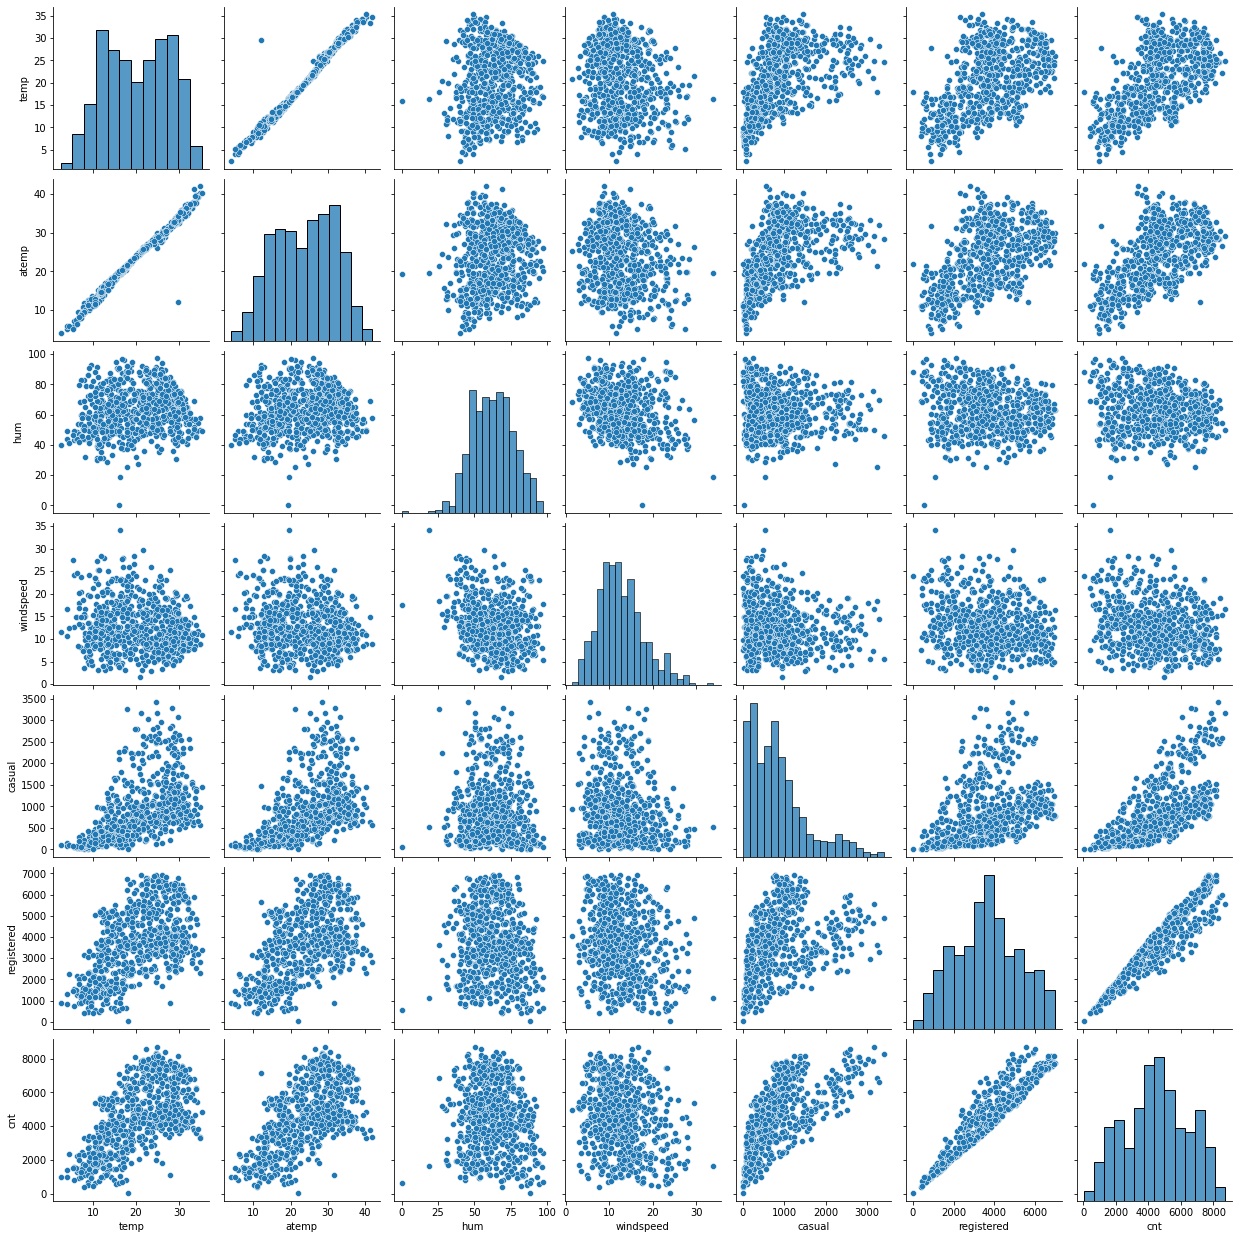

In [16]:
sns.pairplot(num_col)
plt.show()

Bike rentals are more correlated to temperature

**Categorical Variables**

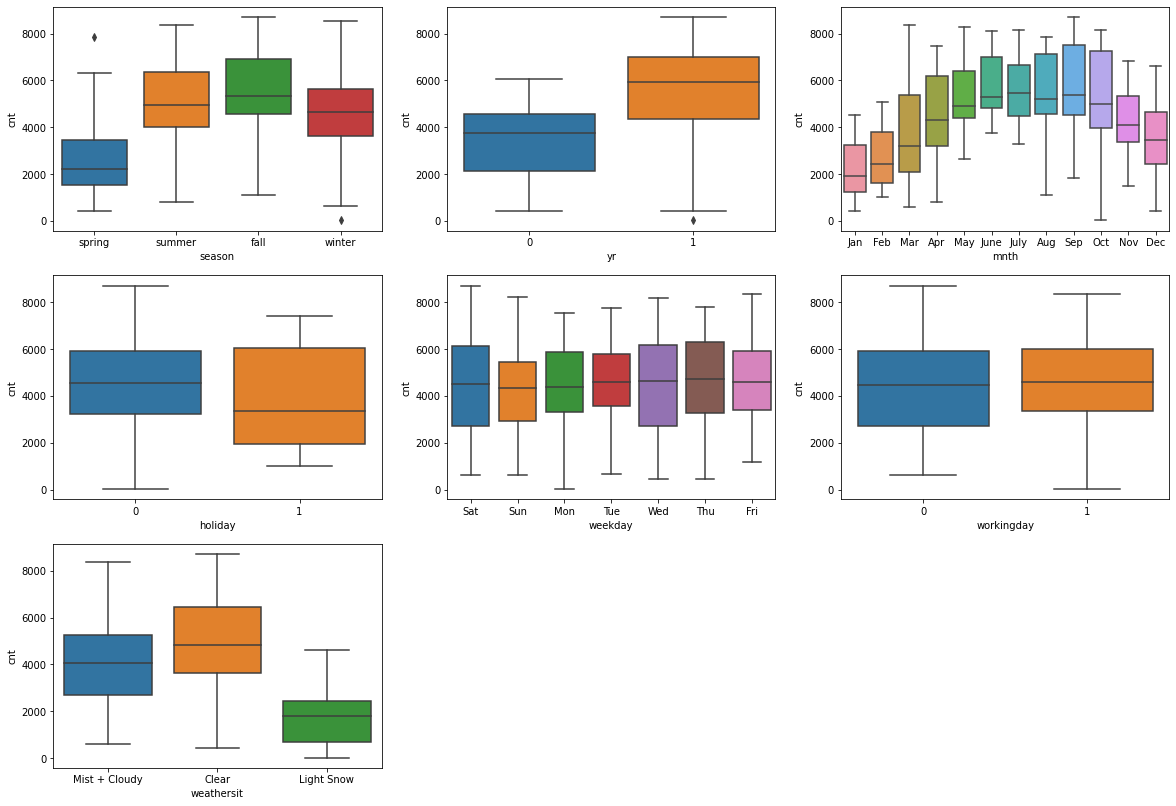

In [17]:
plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

Bike Rentals is higher :


*  During the Fall season
*   In year 2019
*   In clear weather
*   On Holidays


## Univariate Analysis

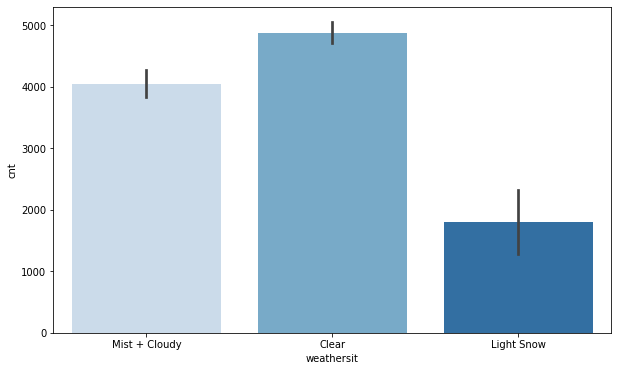

In [18]:
#bike rental and weather
plt.figure(figsize=(10,6))
sns.barplot('weathersit','cnt',data=bike,palette="Blues",)
plt.show()

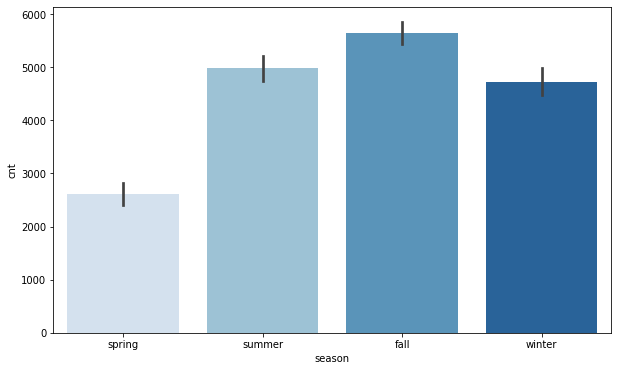

In [19]:
#bike rentals and season
plt.figure(figsize=(10,6))
sns.barplot('season','cnt',data=bike,palette="Blues")
plt.show()

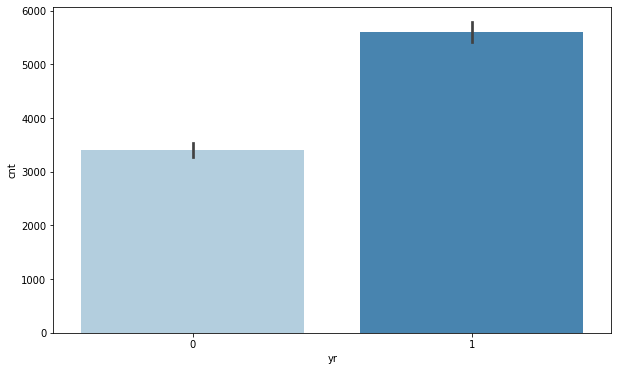

In [20]:
#bike rentals and year
plt.figure(figsize=(10,6))
sns.barplot('yr','cnt',data=bike,palette="Blues")
plt.show()

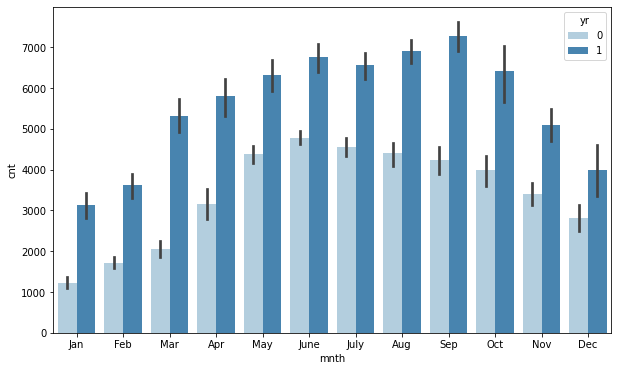

In [21]:
#bike rentals and month 
plt.figure(figsize=(10,6))
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='Blues')
plt.show()

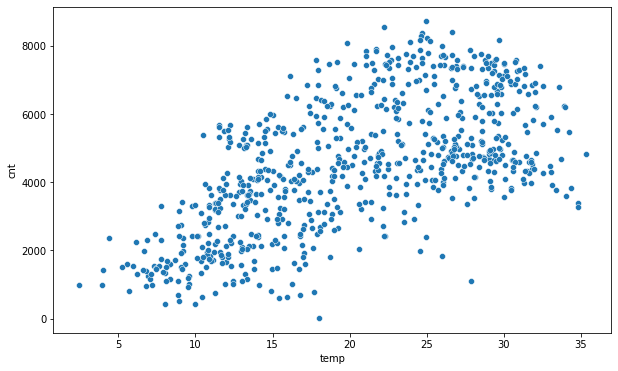

In [22]:
#bike rentals and temp
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp',y='cnt' ,data=bike,palette='Blues')
plt.show()

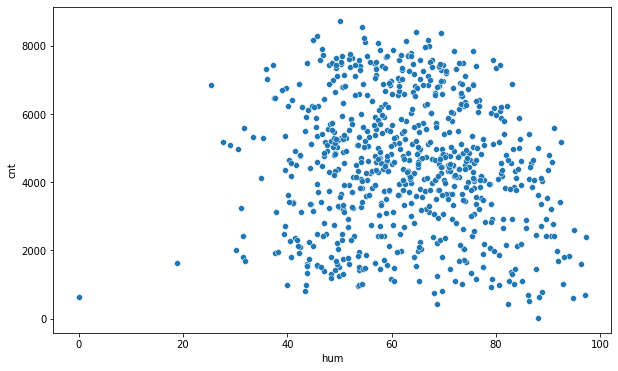

In [23]:
#bike rentals and humidity
plt.figure(figsize=(10,6))
sns.scatterplot(x='hum', y='cnt',data=bike,palette='Blues')
plt.show()

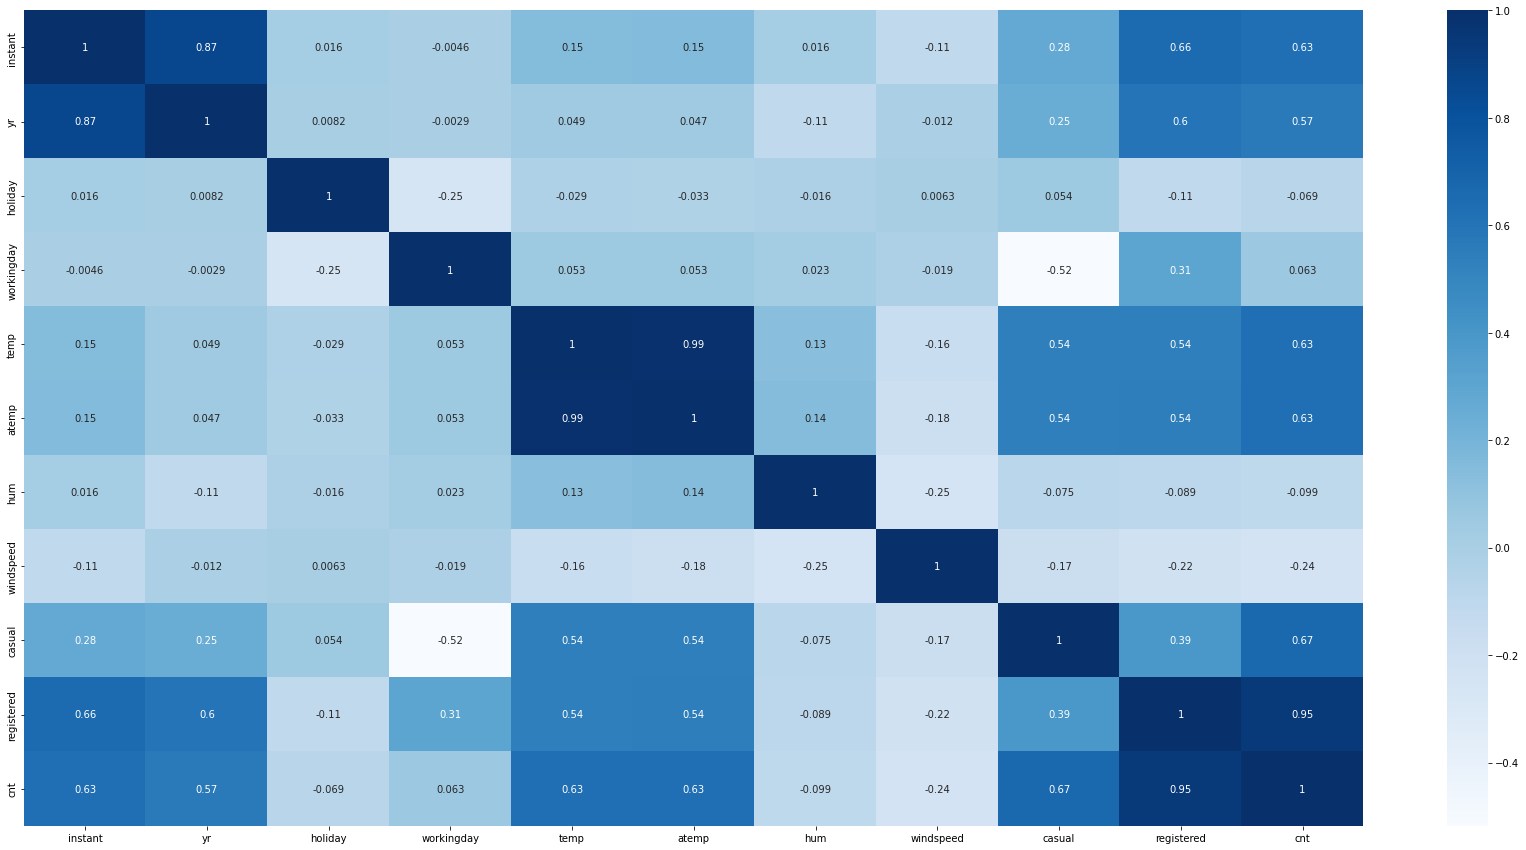

In [24]:
#Correlation Heatmap between variables
plt.figure(figsize=(30, 15))
sns.heatmap(bike.corr(), cmap='Blues', annot = True)
plt.show()

We can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable



*   We can also see some other variables are also most correlated.
*   Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model


*   From this we can Linear Regression Model.

In [25]:
#drop columns

bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# Step 3: Data Preparation

In [26]:
# Dummy variables for month, season, weathersit, weekday)

months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [27]:
# Combining the results to the original bike dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [28]:
# Drop 'season','mnth','weekday','weathersit' 

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [29]:
#Number of rows and columns
bike.shape

(730, 29)

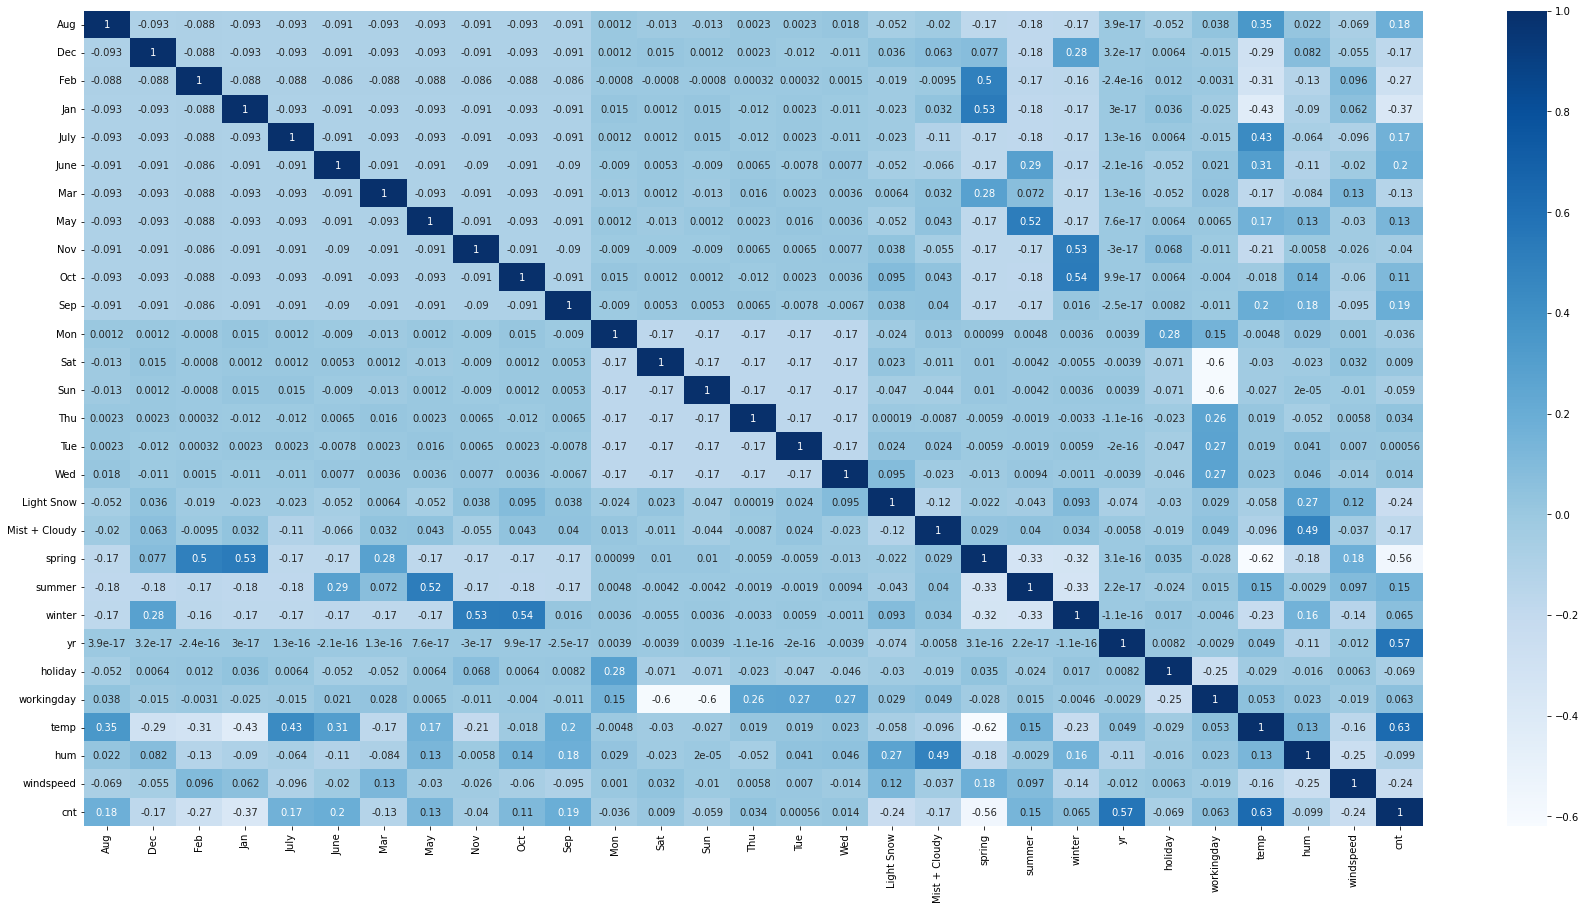

In [30]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables

plt.figure(figsize=(30, 15))
sns.heatmap(bike.corr(), cmap='Blues', annot = True)
plt.show()

Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

In [31]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size = 0.75, random_state = 100)

In [32]:
#determing the shape 
print('bike_train :',bike_train.shape)
print('bike_test :',bike_test.shape)

bike_train : (547, 29)
bike_test : (183, 29)


In [33]:
#import the library for standardizing
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
311,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0.435124,0.743667,0.057471,0.481247
523,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.735215,0.482181,0.286093,0.887483
381,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0.391151,0.737917,0.659615,0.335136
413,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.358285,0.550880,0.319514,0.494248
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.740406,0.735509,0.156398,0.578003


In [34]:
#Checking numeric variables
bike_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Aug,547.0,0.093236,0.291029,0.0,0.000000,0.000000,0.000000,1.0
Dec,547.0,0.087751,0.283192,0.0,0.000000,0.000000,0.000000,1.0
Feb,547.0,0.073126,0.260582,0.0,0.000000,0.000000,0.000000,1.0
Jan,547.0,0.089580,0.285840,0.0,0.000000,0.000000,0.000000,1.0
July,547.0,0.071298,0.257557,0.0,0.000000,0.000000,0.000000,1.0
June,547.0,0.078611,0.269376,0.0,0.000000,0.000000,0.000000,1.0
Mar,547.0,0.096892,0.296082,0.0,0.000000,0.000000,0.000000,1.0
May,547.0,0.084095,0.277784,0.0,0.000000,0.000000,0.000000,1.0
Nov,547.0,0.082267,0.275022,0.0,0.000000,0.000000,0.000000,1.0
Oct,547.0,0.087751,0.283192,0.0,0.000000,0.000000,0.000000,1.0


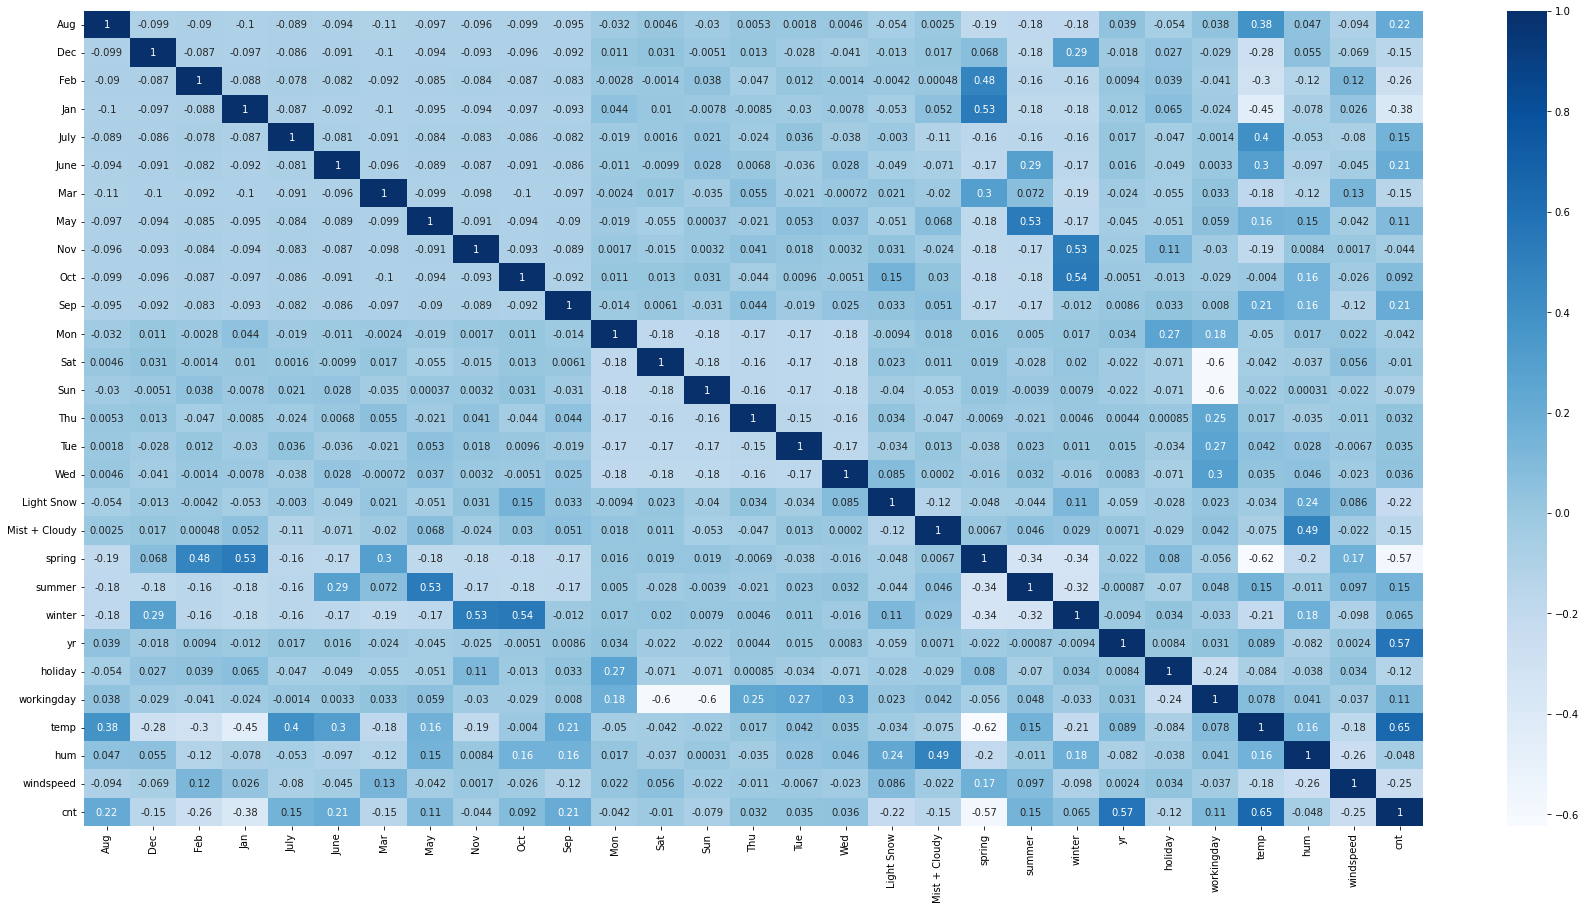

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(30, 15))
sns.heatmap(bike_train.corr(),cmap='Blues',annot = True)
plt.show()

From the heatmap we can see temp, year is correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [36]:
#splitting the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model

In [37]:
#using RFE Recursive Feature Elimination for feature selection
# Importing libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
rfe = RFE(lm, step = 15)            
rfe = rfe.fit(X_train, y_train)

In [40]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [41]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [42]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'summer'],
      dtype='object')

Building model using statsmodel

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [45]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.65e-203
Time:                        03:00:40   Log-Likelihood:                 543.77
No. Observations:                 547   AIC:                            -1060.
Df Residuals:                     533   BIC:                            -999.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2522      0.025     10.135

In [47]:
#checking VIF
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,41.77
3,Sun,10.31
2,Sat,10.09
11,temp,2.79
6,spring,2.78
9,holiday,2.72
12,hum,1.88
7,winter,1.79
5,Mist + Cloudy,1.58
0,Jan,1.49


January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [49]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [50]:
#Build a model without Jan
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     233.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.76e-203
Time:                        03:00:40   Log-Likelihood:                 540.90
No. Observations:                 547   AIC:                            -1056.
Df Residuals:                     534   BIC:                            -999.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2444      0.025      9.865

In [51]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,41.05
2,Sun,10.17
1,Sat,9.93
8,holiday,2.69
10,temp,2.64
5,spring,2.63
11,hum,1.88
6,winter,1.76
4,Mist + Cloudy,1.58
3,Light Snow,1.23


holiday variable can be dropped as its insignificant by looking at very high VIF

In [53]:
#Drop holiday
X_train_new2 = X_train_lm1.drop(["holiday"], axis = 1)

In [54]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     233.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.76e-203
Time:                        03:00:40   Log-Likelihood:                 540.90
No. Observations:                 547   AIC:                            -1056.
Df Residuals:                     534   BIC:                            -999.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2249      0.039      5.834

In [55]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.80
8,workingday,16.21
9,temp,15.00
2,Sun,4.47
11,windspeed,4.42
1,Sat,4.37
5,spring,2.89
4,Mist + Cloudy,2.30
6,winter,2.12
7,yr,2.07


In [57]:
#Drop humidity
X_train_new3 = X_train_lm2.drop(["hum"], axis = 1)

In [58]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.43e-201
Time:                        03:00:40   Log-Likelihood:                 533.99
No. Observations:                 547   AIC:                            -1044.
Df Residuals:                     535   BIC:                            -992.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1494      0.033      4.516

In [59]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,workingday,12.49
9,temp,10.88
10,windspeed,4.40
1,Sat,3.60
2,Sun,3.53
5,spring,2.50
7,yr,2.06
6,winter,1.75
4,Mist + Cloudy,1.57
0,Sep,1.16


In [61]:
#Drop workingday
X_train_new4 = X_train_lm3.drop(["workingday"], axis = 1)

In [62]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     258.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.17e-197
Time:                        03:00:40   Log-Likelihood:                 521.87
No. Observations:                 547   AIC:                            -1022.
Df Residuals:                     536   BIC:                            -974.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2666      0.023     11.359

In [63]:
#Drop the constant
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,3.98
8,temp,3.89
7,yr,2.05
5,spring,1.70
4,Mist + Cloudy,1.52
6,winter,1.38
1,Sat,1.22
2,Sun,1.21
0,Sep,1.16
3,Light Snow,1.08


## Step 6: Residual Analysis of the train data

In [65]:
X_train_lm4=sm.add_constant(X_train_lm4)

#y train predicted
y_train_pred = lm4.predict(X_train_lm4)

In [66]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

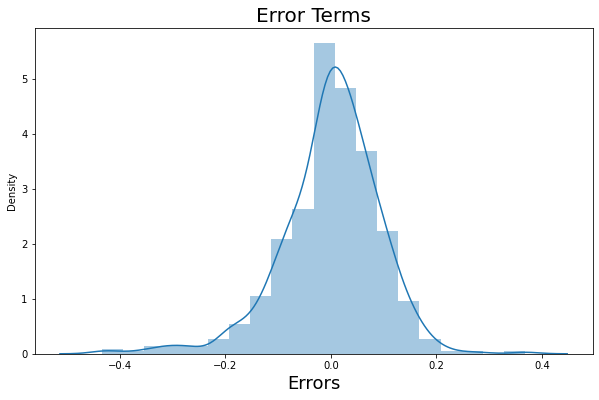

In [67]:
# Plot the histogram of the error terms

fig = plt.figure()

plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Error terms are normally distributed

## Step 7: Making Predictions

In [68]:
#scaling test data


num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [69]:
#splitting into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.060109,0.076503,0.087432,0.071038,0.125683,0.092896,0.049180,0.087432,0.081967,0.076503,...,0.300546,0.213115,0.273224,0.240437,0.475410,0.032787,0.726776,0.568688,0.635166,0.316439
std,0.238341,0.266530,0.283242,0.257593,0.332401,0.291083,0.216838,0.283242,0.275067,0.266530,...,0.459754,0.410632,0.446837,0.428521,0.500765,0.178567,0.446837,0.234887,0.152926,0.159371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362754,0.522601,0.199183
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.575304,0.618721,0.303464
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.774153,0.735079,0.404383
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [70]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,yr,temp,windspeed
184,1.0,0,0,0,0,1,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,0,0,1,0.901354,0.153728
299,1.0,0,0,0,0,1,0,1,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,0,0,0.817246,0.537414


In [71]:

# Making predictions
y_pred = lm4.predict(X_test_new1)

In [72]:
rfe4 = RFE(lm4, step = 11)            
rfe4 = rfe.fit(X_train_new4, y_train)
#List of variables selected
list(zip(X_train.columns,rfe4.support_,rfe4.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', True, 1),
 ('Mar', False, 2),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1)]

## Step 8: Model Evaluation

In [73]:
#Evaluate R-square for test
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred)) 

Train R-Score:  0.8281133302531757


<Figure size 432x288 with 0 Axes>

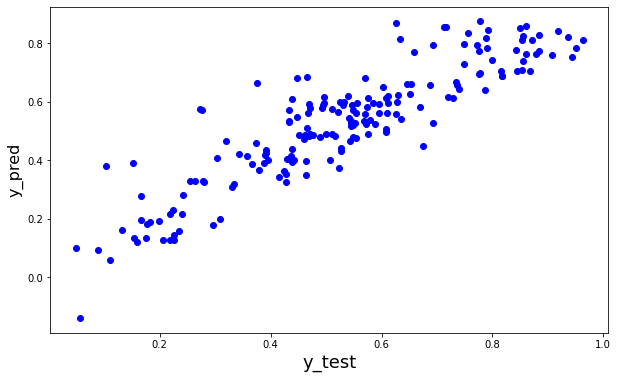

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              

plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

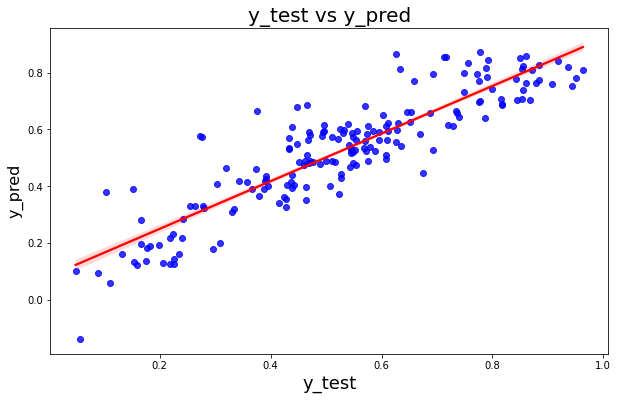

In [75]:
#Regression plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

In [76]:
X_train_new4.columns

Index(['Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'winter',
       'yr', 'temp', 'windspeed'],
      dtype='object')